In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


#### Plotting 2D normal distribution with covariance matrices

#### The unit circle represent the distance of 1 standard deviation, the arrows are the eigenvectors of the covariance matrix

#### only the variances are scaled

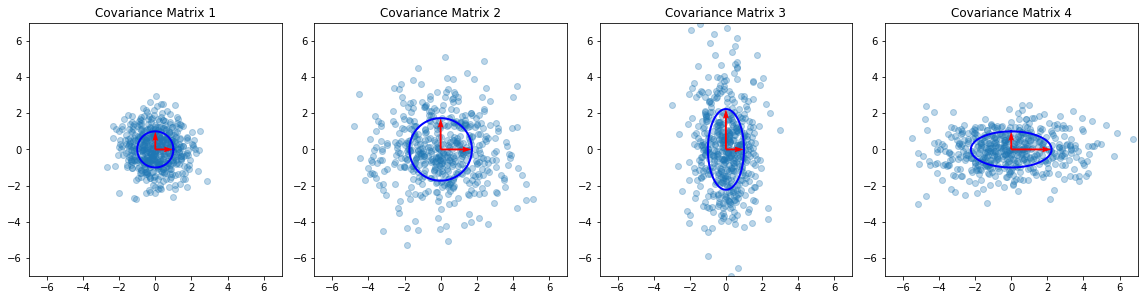

In [14]:
mean = np.zeros(2)
covs = [
    [[1, 0], [0, 1]],
    [[3, 0], [0, 3]],
    [[1, 0], [0, 5]],
    [[5, 0], [0, 1]]
]
n = 500
theta = np.linspace(0, 2 * np.pi, 100)
coordinates = np.column_stack((np.cos(theta), np.sin(theta)))

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
xlim = ylim = [-7, 7]

for i in range(len(covs)):
    cov = np.array(covs[i])
    samples = np.random.multivariate_normal(mean, cov, n)
    axs[i].scatter(samples[:, 0], samples[:, 1], alpha=0.3)

    # Transform unit circle using eigen-decomposition
    eigvals, eigvecs = np.linalg.eigh(cov)
    transform = coordinates @ np.diag(np.sqrt(eigvals)) @ eigvecs.T
    axs[i].plot(transform[:, 0], transform[:, 1], color='blue', linewidth=2)

    # Quiver for principal directions
    for j in range(2):
        vec = eigvecs[:, j] * np.sqrt(eigvals[j])
        axs[i].quiver(0, 0, vec[0], vec[1], color='r', scale=1, scale_units='xy', angles='xy')

    axs[i].set_aspect('equal', 'box')
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_title(f"Covariance Matrix {i+1}")

plt.tight_layout()
plt.show()


#### Data is now created by transforming uniformly distributed data

#### different correlations are shown

In [23]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)

    # Sort eigenvalues and vectors descending
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Calculate ellipse angle in degrees
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Width and height of ellipse are 2*n_std*sqrt(eigenvalues)
    width, height = 2 * n_std * np.sqrt(vals)
    ellipse = Ellipse(xy=(np.mean(x), np.mean(y)),
                      width=width, height=height,
                      angle=theta, facecolor=facecolor, **kwargs)
    ax.add_patch(ellipse)

    # Draw eigenvectors as arrows
    mean_x, mean_y = np.mean(x), np.mean(y)
    for i in range(len(vals)):
        # Eigenvector scaled by sqrt(eigenvalue)*n_std for visualization
        vec = vecs[:, i] * np.sqrt(vals[i]) * n_std
        ax.quiver(mean_x, mean_y, vec[0], vec[1], 
                  angles='xy', scale_units='xy', scale=1, 
                  color='red', width=0.01)

    return ellipse


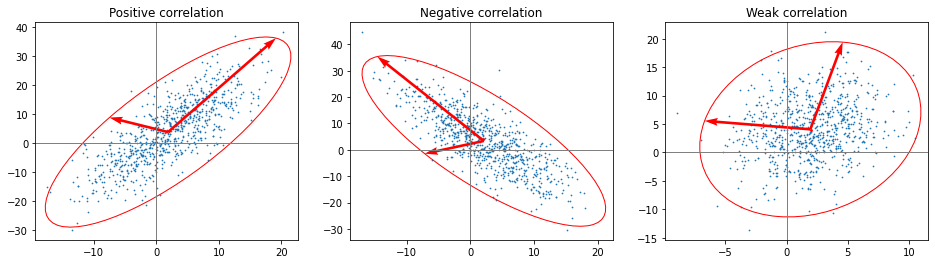

In [26]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[1,2],
                             [2,1]],
    'Negative correlation': [[-1,2],
                             [2,-1]],
    'Weak correlation': 
                         [[1, 0.1],
 [0.1, 1]]
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()
